# STEP 2

In [9]:
import numpy as np
from scipy.optimize import fsolve

# Define constants (Assume the values are given or you can replace them with actual values)
V_rated_ClassX = 11.4  # example value
R_ClassX = 89.15         # example value
I_rated_ClassX = 0.16  # example value
I_rated_ClassY = 0.14 # example value

# Define the system of equations
def equations(vars):
    R_ClassY, V_rated_ClassY = vars
    
    eq1 = R_ClassY - ((V_rated_ClassX * (1 + 2 * I_rated_ClassX)) / (V_rated_ClassY * (1 + 2 * I_rated_ClassY)))**(2/3) * R_ClassX
    eq2 = V_rated_ClassY - (R_ClassX / R_ClassY)**(2/3) * V_rated_ClassX
    
    return [eq1, eq2]

# Initial guess for the values of R_ClassY and V_rated_ClassY
initial_guess = [50, 100]  # Replace with appropriate guesses

# Solve the system of equations
solution = fsolve(equations, initial_guess)

R_ClassY, V_rated_ClassY = solution

# Print the results
print(f"R_ClassY: {R_ClassY}")
print(f"V_rated_ClassY: {V_rated_ClassY}")

R_ClassY: 92.5034864085741
V_rated_ClassY: 11.122788574414757


In [12]:
TSR_old = 8.0

omega_old_rated = TSR_old*V_rated_ClassX/R_ClassX

TSR_new = omega_old_rated*R_ClassY/V_rated_ClassY

V_tip_old = omega_old_rated*R_ClassX

omega_new_rated = TSR_new*V_rated_ClassY/R_ClassY


V_tip_new = omega_new_rated*R_ClassY


print(f"V_tip_old = {V_tip_old}")
print(f"V_tip_new = {V_tip_new}")



V_tip_old = 91.2
V_tip_new = 94.6305996686703
1.0376162244371743


1.0388359746215876 1.0376162244371745


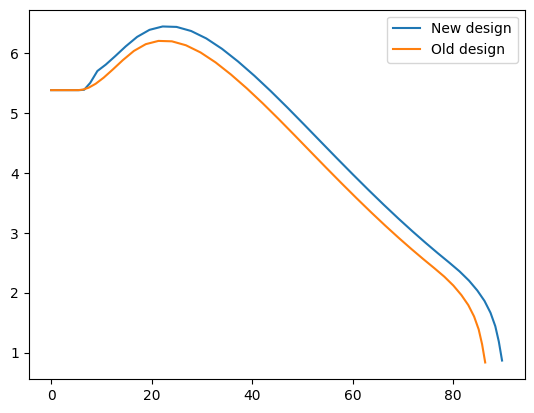

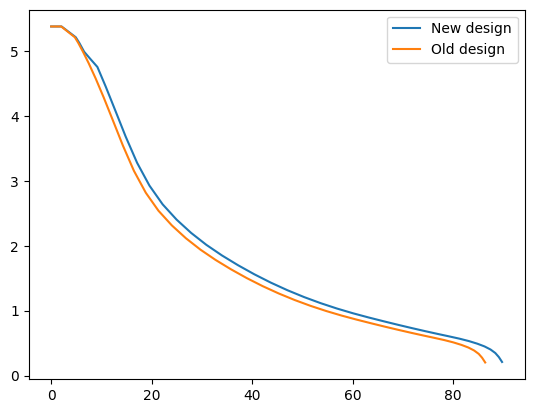

In [14]:
from pathlib import Path 

current_dir = Path.cwd()

DTU_10MW_RWT_ae = current_dir.parent / "data/DTU_10MW_RWT_ae.dat"

data = np.loadtxt(DTU_10MW_RWT_ae, skiprows=2, usecols=(0, 1, 2))

r_array_old = data[:, 0]
chord_array_old = data[:, 1]
rel_thickness_array_old = data[:, 2]

# print(r_array_old, chord_array_old, rel_thickness_array_old)

Hub_radius = 2.8

scale_ratio_blade = (R_ClassY-Hub_radius) / (R_ClassX-Hub_radius)
scale_ratio_rotor = (R_ClassY) / (R_ClassX)
print(scale_ratio_blade, scale_ratio_rotor)

r_array_new = r_array_old * (scale_ratio_blade)
chord_array_new = chord_array_old * (scale_ratio_blade)
chord_array_new[:4] = 5.38
chord_array_new[4] = 5.386
chord_array_new[5] = 5.5 #this is just to smooth the shape of the blade

# print(r_array_new, chord_array_new)

plt.figure()
plt.plot(r_array_new, chord_array_new, label="New design")
plt.plot(r_array_old, chord_array_old, label="Old design")
plt.legend()

abs_thickness_array_old = chord_array_old * rel_thickness_array_old/100
abs_thickness_array_new = chord_array_new * rel_thickness_array_old/100

plt.figure()
plt.plot(r_array_new, abs_thickness_array_new, label="New design")
plt.plot(r_array_old, abs_thickness_array_old, label="Old design")
plt.legend()